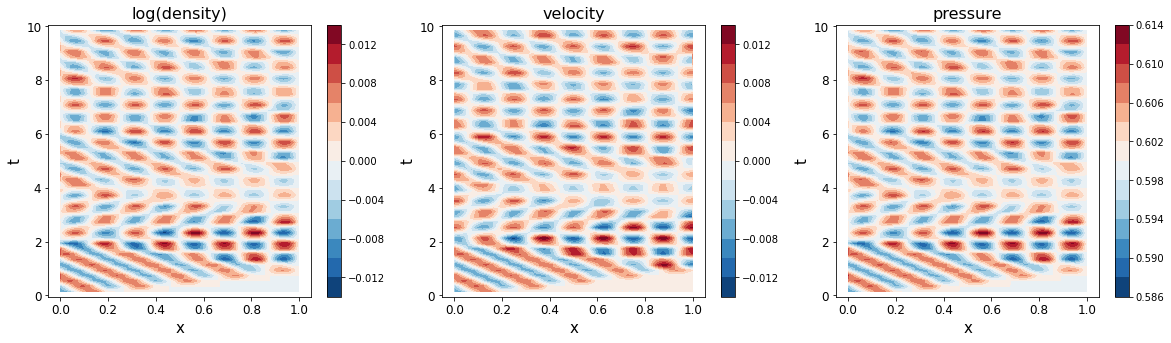

In [7]:
import sys
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import pandas as pd

n_cells = 1000
dir_name = "../results/piston__1000__10.00_0.01_25.13_1.00_0.00__1_0/"
data_dir = dir_name + "/data/"

data = pd.read_csv(data_dir + 'piston_r_u_p.txt', delimiter='\t', names=['r', 'u', 'p', 't'])
length = int(len(data.index) / n_cells)

data["log_r"] = np.log(data["r"])

GAMMA = 5. / 3
data['x'] = data.index

def data_step(i):
    return data.iloc[i * n_cells: (i + 1) * n_cells]

n_steps = int(len(data) / n_cells)

for k in range(len(data)):
    if k % n_cells == 0:
        continue
    else:
        data["t"].iloc[k] = data_step(k // n_cells)["t"].iloc[0]

xi = np.linspace(data.x.min() - 0.05, data.x.max() + 0.05, 1000)
yi = np.linspace(data.t.min() - 0.05, data.t.max() + 0.05, n_steps)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# fig.tight_layout(pad=6, h_pad=4, w_pad=6)
# plt.subplots_adjust(top=0.9, left=0.05, bottom=0.05, wspace=0.1)

ax_values = {ax1: "log_r", ax2: "u", ax3: "p"}
values_names = {"log_r": "log(density)", "u": "velocity", "p": "pressure"}

for ax in ax_values.keys():
    triang = tri.Triangulation(data.x, data.t)
    interpolator = tri.LinearTriInterpolator(triang, data[ax_values[ax]])
    Xi, Yi = np.meshgrid(xi, yi)
    zi = interpolator(Xi, Yi)

    # ax.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
    cntr1 = ax.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")

    fig.colorbar(cntr1, ax=ax)
    ax.set_xlabel("x", fontsize=15)
    ax.set_ylabel("t", fontsize=15)
    ax.set_title(values_names[ax_values[ax]], fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=12)

plt.show()